# Decision Tree Example

- Import Pandas and os<br>
- change the working directory to the the data folder<br>
- read the Hitters.csv file into a pandas dataframe
- preview the top 5 lines of your new dataframe 


In [16]:
## import Pandas and OS

import pandas as pd
import os

## create a variable for the data folder 

datadir = "//home//jovyan/data"

## read the Hitters.csv and preview the top 5 lines

os.chdir(datadir)

dataset = pd.read_csv("Hitters.csv")

dataset.head()

,Name,Hits,Years,Salary,LogSalary
0,Alan Ashby,81,14,475000,5.676694
1,Alvin Davis,130,3,480000,5.681241
2,Andre Dawson,141,11,500000,5.698970
3,Andres Galarraga,87,2,91500,4.961421
4,Alfredo Griffin,169,11,750000,5.875061


- Create a scatter plot to view the LogSalary as an result of Hits versus Years

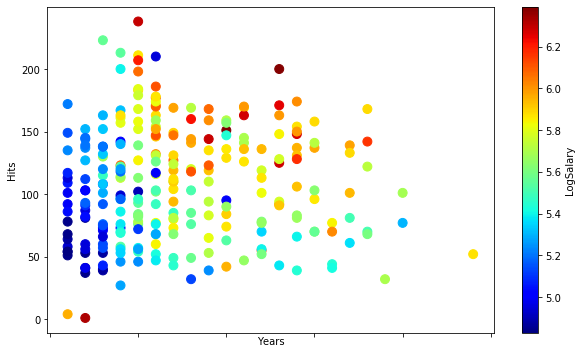

In [17]:
## Create a scatter plot to view the LogSalary as an result of Hits versus Years
## Extra work - can you add labels to the X and Y axis?

from matplotlib import cm
ax = dataset.plot.scatter(x='Years',
                     y='Hits',
                     c='LogSalary',
                     s = 80,
                     figsize=(10,6),
                     colormap='jet')
ax.xaxis.get_label().set_visible(True)

 - Define your X and y values. <br>
X is all the variables (Hits and Years)<br>
y is what you are wanting to predict (LogSalary)<br>

In [18]:
## Define your X and y values
## Hint iloc

X = dataset.iloc[:, 1:3].values
y = dataset.iloc[:, 4].values

- Build the decision tree model (regresion) and view it

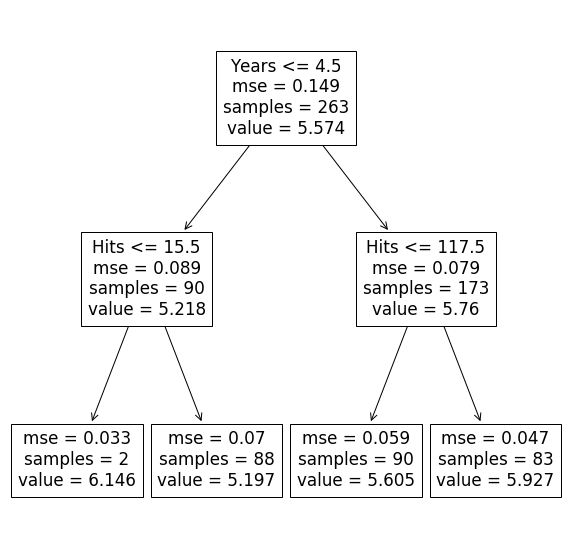

In [19]:
## modules required
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Fit 

regtree = DecisionTreeRegressor(random_state=1234, max_depth=2)
model = regtree.fit(X, y)

# View Tree

fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(regtree, 
                   feature_names=('Hits', 'Years'),  
                   class_names='Salary')

# Random Forest Example

- read the Diabete.csv file into a pandas dataframe<br>
- preview the top 5 lines of your new dataframe<br>

In [2]:
## pandas and os are already imported but you can do it again if you like

import pandas as pd
import os


# directory /home/jovyan/data

datadir = "//home//jovyan//data"

# change directory

os.chdir(datadir)

# load data into pandas dataframe

df = pd.read_csv("Diabetes.csv")

#show the top 5 lines of the dataframe
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


 - Define your X and y values. <br>
X is all the variables <br>
y is what you are wanting to predict <br>

In [3]:
## Define your X and y values
## Hint iloc

X = df.drop("Class", axis=1)
y = df["Class"]

- Split your data into training set and test set (33%)

In [4]:
## train_test_split module

from sklearn.model_selection import train_test_split

# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=66)

- Fit the data to the model

In [5]:
##RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

- Predict the testset<br>
- Display Confusion Matrix

In [12]:
## modules classification_report and confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix

# predictions
rfc_predict = rfc.predict(X_test)

print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[33  5]
 [ 2 76]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.94      0.87      0.90        38
           1       0.94      0.97      0.96        78

    accuracy                           0.94       116
   macro avg       0.94      0.92      0.93       116
weighted avg       0.94      0.94      0.94       116





- Carry out 10-fold cross validation on the dataset<br>
- View the mean AUC Score

In [11]:
## Calculate roc_auc
## module cross_val_score

from sklearn.model_selection import cross_val_score
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring="roc_auc")

print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== All AUC Scores ===
[1.         0.9673913  0.98913043 0.94565217 0.93115942 0.9493007
 1.         1.         1.         0.98426573]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9766899766899767
